<a href="https://colab.research.google.com/github/jazaineam1/nopara/blob/main/Cuadernos/Estimaci%C3%B3n_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Introducción a la Estimación de Densidad No Paramétrica (EDNP)


#### Introducción:

La Estimación de Densidad No Paramétrica (EDNP) es una técnica fundamental en el análisis de datos que nos permite obtener una representación suave de la función de densidad de probabilidad de una variable aleatoria, sin imponer suposiciones específicas sobre su forma funcional. En esta clase, exploraremos en profundidad qué es la EDNP, por qué es importante y cuándo y cómo se utiliza en el análisis de datos.

#### ¿Por qué es importante la Estimación de Densidad No Paramétrica?

1. **Flexibilidad**: A menudo, en el análisis de datos, no conocemos la distribución subyacente de los datos o es difícil de especificar. La EDNP nos permite explorar la distribución de los datos de manera flexible y sin hacer suposiciones restrictivas sobre su forma.

2. **Exploración de datos**: La EDNP nos permite visualizar la distribución de los datos de manera suave y continua, lo que facilita la identificación de patrones, tendencias y comportamientos en los datos.

3. **Modelado no lineal**: Los datos del mundo real pueden exhibir patrones complejos y no lineales que no pueden ser capturados adecuadamente por modelos paramétricos. La EDNP puede adaptarse a estos casos de manera más efectiva al proporcionar una representación suave y flexible de la distribución de los datos.

4. **Suposiciones mínimas**: A diferencia de los métodos paramétricos, donde se deben hacer suposiciones específicas sobre la forma de la distribución (por ejemplo, distribución normal, distribución de Poisson), la EDNP no requiere suposiciones a priori sobre la forma funcional de la distribución.




### Uso del Histograma en EDNP:

El histograma es una de las formas más simples pero efectivas de realizar la Estimación de Densidad No Paramétrica (EDNP). En este enfoque, el rango de los datos se divide en intervalos (bins), y se cuenta el número de observaciones que caen dentro de cada intervalo. La altura de cada barra del histograma representa la densidad de observaciones en ese intervalo.

#### ¿Cómo funciona el Histograma como Método de Estimación de la Densidad?

1. **División en intervalos**: El primer paso en la construcción de un histograma es determinar el número y el ancho de los intervalos en los que se dividirá el rango de los datos. Una regla común es la regla de Scott o la regla de Freedman-Diaconis para determinar el ancho de los intervalos de forma automática.

2. **Conteo de observaciones**: Una vez que se han definido los intervalos, se cuenta el número de observaciones que caen dentro de cada intervalo.

3. **Normalización**: Para convertir el conteo en densidades, se divide el número de observaciones en cada intervalo por el ancho del intervalo y el número total de observaciones. Esto asegura que la suma de las densidades sea igual a uno, lo que hace que el histograma sea una estimación de la densidad de probabilidad.

4. **Representación gráfica**: Finalmente, se grafica el histograma, donde la altura de cada barra representa la densidad de observaciones en el intervalo correspondiente.

#### Ejemplo en R:




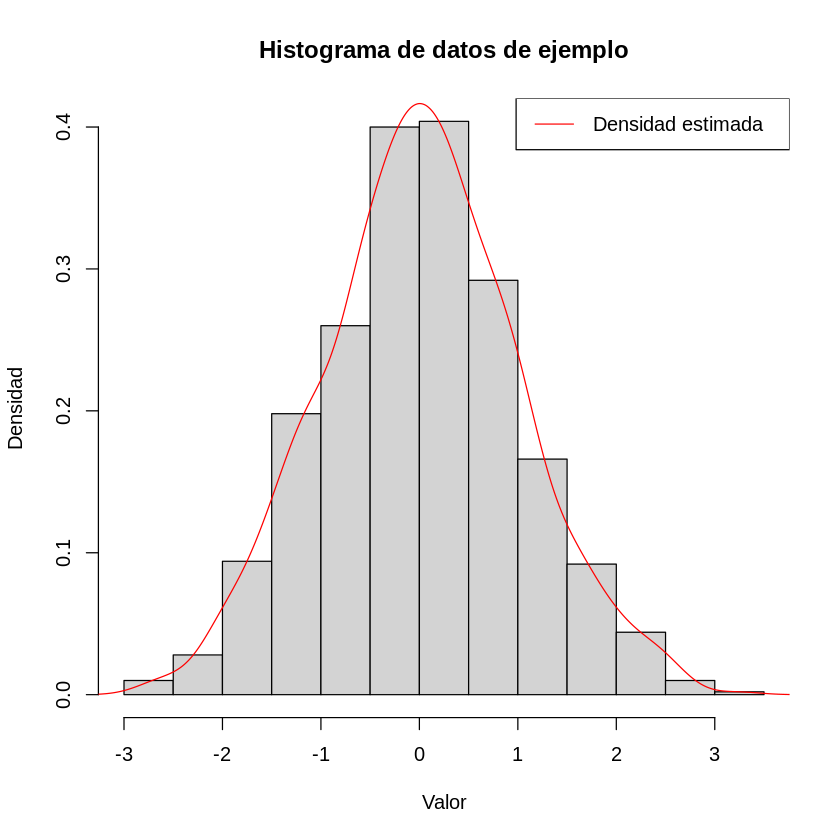

In [1]:
# Paso 1: Generar datos de ejemplo
set.seed(123)
datos <- rnorm(1000)

# Paso 2: Crear el histograma
hist(datos, freq = FALSE, main = "Histograma de datos de ejemplo", xlab = "Valor", ylab = "Densidad")

# Paso 3: Obtener la densidad estimada
densidad_estimada <- density(datos)

# Paso 4: Agregar la curva de densidad estimada al histograma
lines(densidad_estimada, col = "red")

# Paso 5: Personalizar el gráfico
legend("topright", legend = "Densidad estimada", col = "red", lty = 1)



#### Interpretación del Ejemplo:

- En este ejemplo, generamos datos de ejemplo de una distribución normal con media cero y desviación estándar uno.
- Utilizamos la función `hist()` para crear el histograma de los datos, especificando `freq = FALSE` para que la altura de las barras represente la densidad en lugar de las frecuencias.
- Luego, usamos la función `density()` para obtener una estimación de la densidad de los datos.
- Finalmente, agregamos la curva de densidad estimada al histograma utilizando la función `lines()`.

El histograma proporciona una representación visual de la distribución de los datos, mientras que la curva de densidad estimada ofrece una representación suave y continua de la densidad de probabilidad subyacente.

### Estimación Kernel
### Introducción a la Estimación Kernel

#### ¿Qué es la Estimación de Densidad?

Antes de profundizar en la estimación kernel, es importante entender qué significa la estimación de densidad en el contexto de la estadística. La **estimación de densidad** es un procedimiento estadístico utilizado para estimar la función de densidad de probabilidad (PDF, por sus siglas en inglés) de una variable aleatoria. La PDF describe la probabilidad relativa de que una variable aleatoria tome un valor en un intervalo específico y es fundamental en muchas áreas de la estadística y la ciencia de datos para entender la distribución de los datos.

#### Estimación de Densidad No Paramétrica

La estimación de densidad puede ser paramétrica o no paramétrica. Los métodos paramétricos suponen que la distribución subyacente de los datos sigue una forma específica (como la distribución normal), y se estiman los parámetros de esa distribución. Por otro lado, los métodos no paramétricos, como la **estimación kernel**, no hacen tales suposiciones y son más flexibles, pudiendo adaptarse a cualquier forma de distribución de datos.

#### Fundamentos de la Estimación Kernel

La estimación kernel es un método prominente en la estimación de densidad no paramétrica. El objetivo es construir una estimación suave de la función de densidad que sea capaz de capturar las características esenciales de la distribución de los datos sin la necesidad de suponer una forma específica para esta distribución.

La estimación kernel se basa en la suma de funciones ubicadas en cada punto de datos. La fórmula del estimador kernel es la siguiente:

$$ \hat{f}(x) = \frac{1}{nh} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right) $$

donde:
- $ \hat{f}(x) $ es la estimación de la densidad en el punto $ x $.
- $ n $ es el número de puntos de datos.
- $ X_i $ son los datos observados.
- $ K $ es la función kernel, que es una función de probabilidad que suma 1 y es simétrica alrededor de cero.
- $ h $ es el ancho de banda, que controla la suavidad de la función de densidad estimada.

#### Elección de la Función Kernel

El kernel actúa como un ponderador, dando más importancia a los puntos cercanos a $ x $ y menos a los más alejados. Las funciones de kernel más comunes incluyen:
- **Gaussiano**: Este kernel produce una curva suave y es muy popular debido a sus buenas propiedades matemáticas.
- **Epanechnikov**: Tiene una forma de semicírculo y es óptimo en el sentido de minimizar el error cuadrático medio en la estimación de la densidad.
- **Uniforme**: Da igual peso a todos los puntos dentro de un rango específico y cero fuera de él.

#### Importancia del Ancho de Banda

El parámetro $ h $, conocido como ancho de banda, es crucial en la estimación kernel. Un $ h $ pequeño puede llevar a una estimación "accidentada" o sobreajustada, mientras que un $ h $ grande puede suavizar demasiado la distribución, perdiendo detalles importantes. La selección de un ancho de banda adecuado es un balance entre sesgo y varianza, y existen varios métodos automáticos para elegirlo, como la regla de Silverman y la validación cruzada.



### Elección del Kernel en la Estimación de Densidad

La función kernel es un componente central en la estimación de densidad kernel, actuando como un suavizador local que pondera los datos en torno a cada punto de evaluación. Varios tipos de funciones kernel pueden ser utilizados, cada uno con características distintivas que pueden influir en la estimación de la densidad resultante. A continuación, describimos algunas de las funciones de kernel más comunes y cómo su elección puede afectar los resultados de la estimación.

#### Funciones de Kernel Comunes

1. **Kernel Gaussiano:**
   - **Fórmula:** $ K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}} $
   - **Características:** Este kernel es suave e infinitamente diferenciable. Produce estimaciones de densidad muy suaves y es muy popular debido a sus buenas propiedades matemáticas y estadísticas.

2. **Kernel Epanechnikov:**
   - **Fórmula:** $ K(u) = \frac{3}{4}(1-u^2) $ para $ |u| \leq 1 $, y 0 de lo contrario.
   - **Características:** Este kernel es óptimo en el sentido de que minimiza la varianza asintótica de la estimación, lo que significa que, teóricamente, proporciona la estimación más precisa en términos de error cuadrático medio integrado.

3. **Kernel Uniforme (o Rectangular):**
   - **Fórmula:** $ K(u) = \frac{1}{2} $ para $ |u| \leq 1 $, y 0 de lo contrario.
   - **Características:** Da igual peso a todos los puntos dentro del rango especificado y ninguno fuera de este. La estimación de densidad resultante es una simple media de las densidades en el rango de $ h $.

4. **Kernel Triangular:**
   - **Fórmula:** $ K(u) = (1 - |u|) $ para $ |u| \leq 1 $, y 0 de lo contrario.
   - **Características:** Es similar al kernel uniforme pero da pesos linealmente decrecientes a puntos más lejanos dentro del rango.

#### Impacto de la Elección del Kernel

Aunque la elección del kernel puede afectar la estimación de la densidad, en la práctica, el efecto del tipo de kernel es generalmente menos significativo que la elección del ancho de banda $ h $. Los diferentes kernels pueden llevar a ligeras variaciones en la forma de la curva estimada, especialmente en las colas de la distribución o cuando los datos son escasos. Sin embargo, todos tienden a producir estimaciones razonablemente buenas si el ancho de banda está correctamente seleccionado.

El ancho de banda determina el grado de suavidad de la curva de densidad estimada: un ancho de banda más pequeño puede llevar a una curva más accidentada con más variabilidad local, mientras que un ancho de banda más grande puede suavizar excesivamente los datos, potencialmente ocultando estructuras significativas como modas múltiples.


Vamos a realizar un ejemplo práctico de la estimación de la densidad usando un kernel Gaussiano con un pequeño conjunto de datos reales en R. Para simplificar, utilizaré una muestra pequeña de datos para poder calcular y visualizar la estimación de la densidad de forma explícita paso a paso.

### Ejemplo Práctico en R

Supongamos que tenemos una muestra pequeña de datos que representan, por ejemplo, mediciones de una característica en particular (como alturas o pesos). Usaremos los siguientes datos para este ejemplo:

$$ \text{Datos} = \{2, 3, 4, 5, 6\} $$

Para la función kernel, usaremos el kernel Gaussiano, que tiene la forma:

$$ K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}} $$

El ancho de banda $ h $ lo seleccionaremos de manera un poco arbitraria para fines ilustrativos, digamos $ h = 1 $.

#### Paso 1: Configurar el entorno en R


#### Paso 2: Calcular la Densidad Kernel

El estimador de densidad kernel para un conjunto de puntos $ x $ usando nuestro conjunto de datos y el kernel Gaussiano se calcula como:

$$ \hat{f}(x) = \frac{1}{n h} \sum_{i=1}^n K\left(\frac{x - X_i}{h}\right) $$

Donde:
- $ n $ es el número de datos, que en este caso es 5.
- $ X_i $ son los valores de los datos.
- $ h $ es el ancho de banda.

#### Paso 3: Visualización

Luego visualizaremos cómo se ve la función de densidad estimada.


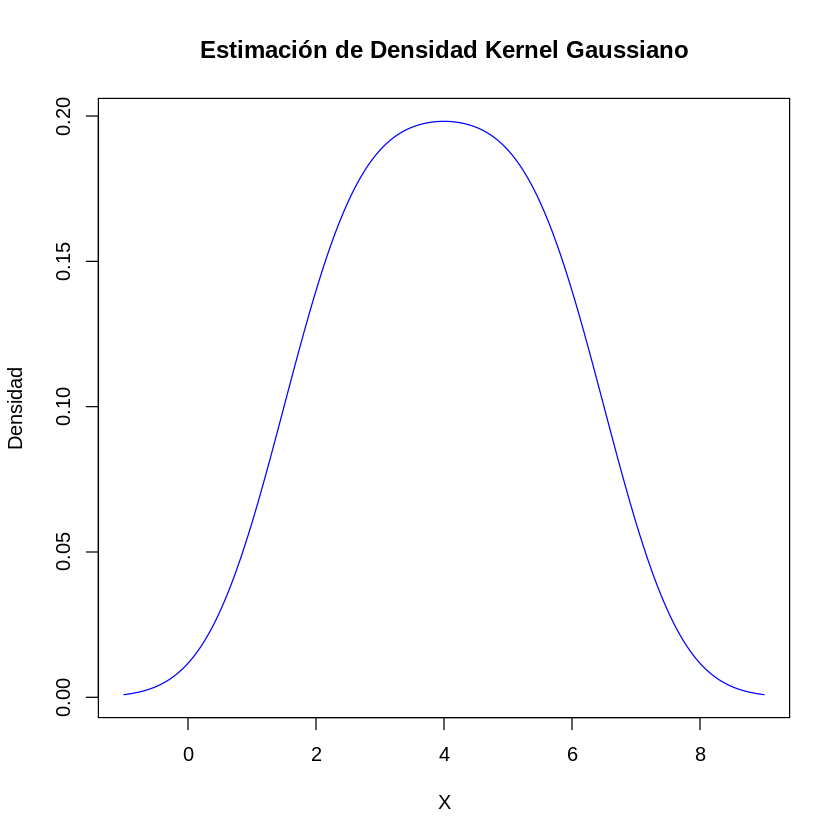

In [5]:
# Datos de ejemplo
datos <- c(2, 3, 4, 5, 6)

# Ancho de banda
h <- 1

# Función kernel Gaussiano
kernel_gaussiano <- function(u) {
  (1 / sqrt(2 * pi)) * exp(-0.5 * u^2)
}

# Estimador de densidad kernel
estimacion_kernel <- function(x, datos, h) {
  n <- length(datos)
  sumatoria <- 0
  for (dato in datos) {
    u <- (x - dato) / h
    sumatoria <- sumatoria + kernel_gaussiano(u)
  }
  (1 / (n * h)) * sumatoria
}

# Valores de x para la estimación
x_vals <- seq(min(datos) - 3, max(datos) + 3, length.out = 300)

# Calculamos la densidad para cada x
densidades <- sapply(x_vals, estimacion_kernel, datos = datos, h = h)

# Gráfico
plot(x_vals, densidades, type = "l", main = "Estimación de Densidad Kernel Gaussiano",
     xlab = "X", ylab = "Densidad", col = "blue")


Ahora realizaremos un ejemplo práctico usando funciones de R ya incorporadas para la estimación de densidad mediante el kernel. Usaremos el mismo conjunto de datos para facilitar la comparación. R proporciona la función `density()` que es muy útil para realizar estimaciones de densidad no paramétricas de forma rápida y eficiente.

### Ejemplo Práctico con `density()` en R

Usaremos los mismos datos del ejemplo anterior:

$$ \text{Datos} = \{2, 3, 4, 5, 6\} $$

Para este ejemplo, también emplearemos el kernel Gaussiano, que es el predeterminado en la función `density()`. Ajustaremos el ancho de banda manualmente para mantenerlo consistente con el ejemplo previo.

####  en R



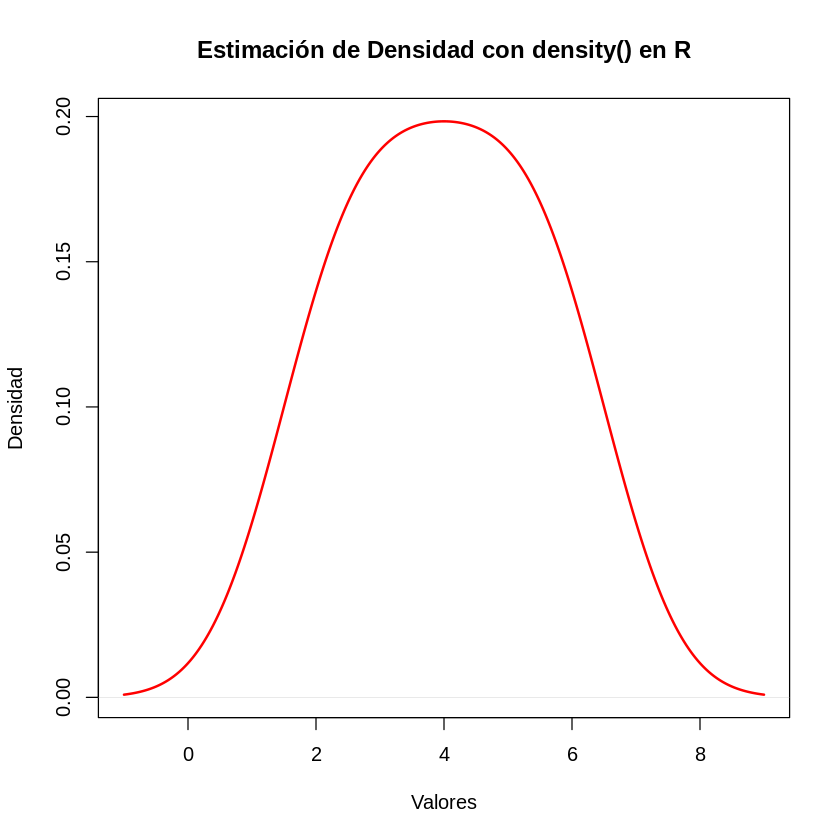

In [6]:
# Datos de ejemplo
datos <- c(2, 3, 4, 5, 6)

# Usando la función density() de R con ancho de banda especificado
densidad_estimada <- density(datos, kernel = "gaussian", bw = 1, n = 512)

# Gráfico de la densidad estimada
plot(densidad_estimada, main = "Estimación de Densidad con density() en R",
     xlab = "Valores", ylab = "Densidad", col = "red", lwd = 2)


#### Explicación del Código

1. **Datos de ejemplo:** Definimos un vector `datos` que contiene los puntos de muestra.

2. **Estimación de Densidad:** La función `density()` es utilizada para calcular la densidad de los datos. Especificamos el uso del kernel Gaussiano (aunque es el predeterminado), un ancho de banda de `1`, y aumentamos el número de puntos en los que se evalúa la densidad a `512` para una curva más suave.

3. **Gráfico:** La función `plot()` se utiliza para visualizar la densidad estimada. Se asigna un color rojo a la curva y se incrementa el grosor de la línea con `lwd = 2` para mejorar la visibilidad.

### Resultados

Al ejecutar el código en R, obtendrás una gráfica que muestra la densidad estimada para el conjunto de datos proporcionado. La curva de densidad resultante debería mostrar una forma suave que se centra alrededor de los puntos de datos, reflejando la distribución general de los datos con un ancho de banda que proporciona una suavidad adecuada.

Este enfoque con `density()` es extremadamente útil para análisis exploratorios de datos, ya que permite ajustar rápidamente los parámetros y obtener una visualización instantánea de la distribución subyacente de los datos. Además, `density()` soporta otros kernels como "epanechnikov", "rectangular" (uniforme), "triangular", "biweight" (quartic), "cosine" y "optcosine", lo que ofrece flexibilidad para experimentar con diferentes tipos de suavizado.

## Ejercicio

1. Realice la simulación de datos de una distribución poisson de media 4.5.
2. Revise la documentación de density y use 3 diferentes Kernel.
3. Realice la aplicación de funciones por medio de código para comparar sus resultados con los de la función.